                        RELATIVE SPEED
Jushur                        0.998891
Kullassina-bel                0.998254
Nangishlishma                 0.996314
En-tarah-ana                  0.990809
Babum                         0.981488
Puannum                       0.997629
Kalibum                       0.998223
Zuqaqip                       0.998050
Atab                          0.995478
Mashda                        0.997634
Arwium                        0.996962
Etana                         0.999325
Balih                         0.989783
En-men-lu-ana                 0.998856
Dumuzid, the Shepherd         0.998359
Ensipazi-anna                 0.996674
Enmengal-ana                  0.996317
Dumuzid, the Fisherman        0.998321
Jushur                        0.998844
Kullassina-bel                0.998188
Nangishlishma                 0.996441
En-tarah-ana                  0.990554
Babum                         0.981251
Puannum                       0.997628
Kalibum                  

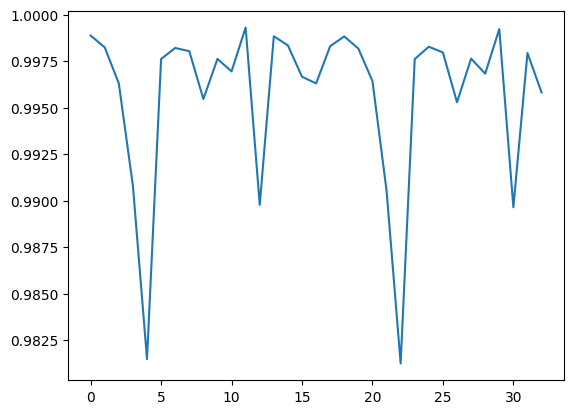

In [6]:
from matplotlib.pyplot import plot
import pandas as pd
import numpy as np
from scipy.stats import truncnorm



kish_kings = [
    # Antediluvian (mythical) kings
    ("Jushur", 1200),
    ("Kullassina-bel", 960),
    ("Nangishlishma", 670),
    ("En-tarah-ana", 420),
    ("Babum", 300),
    ("Puannum", 840),
    ("Kalibum", 960),
    ("Zuqaqip", 900),
    ("Atab", 600),
    ("Mashda", 840),
    ("Arwium", 720),
    ("Etana", 1560),
    ("Balih", 400),
    ("En-men-lu-ana", 1200),
    ("Dumuzid, the Shepherd", 1000),
    ("Ensipazi-anna", 700),
    ("Enmengal-ana", 670),
    ("Dumuzid, the Fisherman", 1000),

    # Postdiluvian (legendary and early historical) kings
    ("Jushur", 1200),
    ("Kullassina-bel", 960),
    ("Nangishlishma", 670),
    ("En-tarah-ana", 420),
    ("Babum", 300),
    ("Puannum", 840),
    ("Kalibum", 960),
    ("Zuqaqip", 900),
    ("Atab", 600),
    ("Mashda", 840),
    ("Arwium", 720),
    ("Etana", 1560),
    ("Balih", 400),
    ("En-me-barage-si", 900),
    ("Aga", 625)
]

# Useful derived structures
king_names = [name for name, years in kish_kings]
reigns = np.array([years for name, years in kish_kings], dtype=float)

N_samples = 100000
lower_age = 10
upper_age = 80

#y_samples = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=N_samples)
b_samples_all = []
y_samples_all = []

# Monte Carlo sampling
for x_t in reigns:
    b_samples = np.random.uniform(0, 1, N_samples)
    y_samples = x_t * np.sqrt(1 - b_samples**2)
    valid = (y_samples >= lower_age) & (y_samples <= upper_age)
    b_samples_all.append(b_samples[valid])
    y_samples_all.append(y_samples[valid])

# Compute mean and percentiles
b_mean = np.array([np.mean(b) if len(b) > 0 else np.nan for b in b_samples_all])
b_lower = np.array([np.percentile(b, 5) if len(b) > 0 else np.nan for b in b_samples_all])
b_upper = np.array([np.percentile(a, 95) if len(a) > 0 else np.nan for a in b_samples_all])

y_mean = np.array([np.mean(y) if len(y) > 0 else np.nan for y in y_samples_all])
y_lower = np.array([np.percentile(y, 5) if len(y) > 0 else np.nan for y in y_samples_all])
y_upper = np.array([np.percentile(y, 95) if len(y) > 0 else np.nan for y in y_samples_all])

t = np.arange(len(reigns))


df = pd.DataFrame(b_mean, columns=["RELATIVE SPEED"],index=king_names)
df.loc['Usi-watar', 'RELATIVE SPEED'] = 0.306  # new value
df.loc['Nanniya', 'RELATIVE SPEED'] = 0.201  # new value
print(df)
print (b_mean)

df_time = pd.DataFrame(reigns, columns=["REIGN (years)"],index=king_names)
print(df_time)

# distance in light-years (assuming c = 1 ly/year)
df_mul = df.iloc[:, 0] * df_time.iloc[:, 0]  # multiply as Series
df_mul = df_mul.to_frame('Distance')       # convert back to DataFrame

# totals
total_light_years = df_mul.sum()

print(total_light_years)

#print(b_mean)
plot(t, b_mean)